In [ ]:
'''
載入IMDB資料集
'''
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [9]:
print(train_data[0]) # 取得第一筆評論
print(train_labels[10]) # 取得第十筆評論是否為正面? # 1:正面; 0:負面

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [13]:
# 取得評論內容
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, 'comment:') for i in train_data[0]])
print(decoded_review)

comment: this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert comment: is an amazing actor and now the same being director comment: father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for comment: and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also comment: to the two little boy's that played the comment: of norman and paul they were just brilliant children are often left out of the comment: list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

In [ ]:
'''
將2層的整數list編碼成二元矩陣
'''
import numpy as np

def vectorize_sequences(sequences, dimension = 10000): # 此參數將傳入2層的list
    results = np.zeros((len(sequences), dimension)) # 建立全為0的矩陣,其形狀為(len(sequences), dimension),其中len(sequences)為樣本數
    for i, sequence in enumerate(sequences): # 用enumerate()為每個子串列編號,編號會存到i, 子串列存到sequence
        results[i, sequence] = 1. # 將results[i]中的多個元素(以sequence串列的每個元素值為索引)設為1.0
    return results

x_train = vectorize_sequences(train_data) # 將訓練資料向量化
x_test = vectorize_sequences(test_data) # 將測試資料向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [35]:
x_train[0] # 顯示第0列向量 #印出的array由0與1組成

array([0., 1., 1., ..., 0., 0., 0.])

In [36]:
'''
模型定義
'''
from keras import models
from keras import layers

model = models.Sequential() #使用models模組的Sequential類別,建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, ))) # 輸入層亦是隱藏層
model.add(layers.Dense(16, activation = 'relu')) # 隱藏層
model.add(layers.Dense(16, activation = 'relu')) # 隱藏層
model.add(layers.Dense(1, activation = 'sigmoid')) # 輸出層

In [37]:
'''
編譯模型
'''
# 指定損失函數,並進行compile
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [38]:
'''
調整優化器, 自己定義損失函數與metrics函數
'''
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [39]:
'''
設定驗證資料集
'''
x_val = x_train[:10000] # 取輸入資料前10000個做為驗證資料集
partial_x_train = x_train[10000:] # 輸入資料的第10000個開始為訓練資料

y_val = y_train[:10000] # 取輸入資料前10000個做為驗證標籤
partial_y_train = y_train[10000:] # 輸入資料的第10000個開始為訓練標籤

In [40]:
'''
訓練模型
'''
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy']) # 建立訓練模型

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 122s 8ms/step - loss: 0.5265 - acc: 0.7707 - val_loss: 0.3947 - val_acc: 0.8586
Epoch 2/20
15000/15000 [==============================] - 33s 2ms/step - loss: 0.3031 - acc: 0.9027 - val_loss: 0.3352 - val_acc: 0.8642
Epoch 3/20
15000/15000 [==============================] - 11s 732us/step - loss: 0.2189 - acc: 0.9274 - val_loss: 0.3223 - val_acc: 0.8693
Epoch 4/20
15000/15000 [==============================] - 11s 749us/step - loss: 0.1715 - acc: 0.9432 - val_loss: 0.2765 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 12s 768us/step - loss: 0.1367 - acc: 0.9559 - val_loss: 0.2951 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 15s 984us/step - loss: 0.1113 - acc: 0.9650 - val_loss: 0.3084 - val_acc: 0.8840
Epoch 7/20
15000/15000 [==============================] - 14s 951us/step - loss: 0.0909 - acc: 0.9730 - val_loss: 0.384

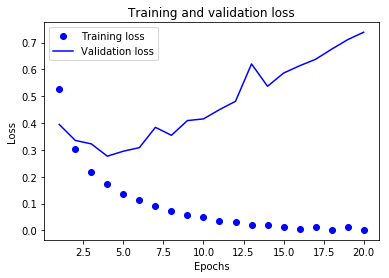

In [41]:
'''
繪製訓練與驗證的損失分數
'''
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values) + 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

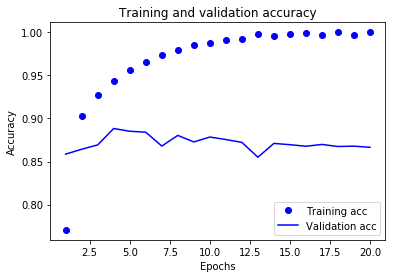

In [42]:
'''
繪製訓練和驗證的準確度
'''
plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
'''
重新開始訓練模型
'''
model = models.Sequential()  #建立模型
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)  #訓練 4 個週期的神經網路
results = model.evaluate(x_test, y_test)  #輸入測試資料與測試標籤進行評估

Epoch 1/4
25000/25000 [==============================] - 64s 3ms/step - loss: 0.4688 - acc: 0.8208
Epoch 2/4
25000/25000 [==============================] - 17s 674us/step - loss: 0.2662 - acc: 0.9080
Epoch 3/4
25000/25000 [==============================] - 15s 610us/step - loss: 0.2029 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 195s 8ms/step


In [44]:
results

[0.2910528731822968, 0.88512]

In [45]:
model.predict(x_test)

array([[0.18253799],
       [0.99996257],
       [0.8815568 ],
       ...,
       [0.0931292 ],
       [0.0643963 ],
       [0.53191185]], dtype=float32)